Enter the Grid Size: The Number of Squares Along One Side of a Square Grid, 5 or 10, say ---  5


The Size of the Hypothetical Spatial System is 5 Zones by 5 Zones, Making 25 in All


The Mean Trip Length of the Hypothetical System  1.8446717488181015



Enter the Parameter Value on Distance - beta - that You Think Best Fits the Data: It should be greater than 0 and less than 1 ----  0.7



You now have to input one of the Four Model Variants that you want to run

We will number these as

1 The Unconstrained Model as in the Basic Gravity Model Program
2 The Singly-Constrained (Origin-Constrained) Model
3 The Singly-Constrained (Destination-Constrained) Model
4 The Doubly-Constrained (Origin-and-Destination Constrained) Model



Type in the Relevant Number from 1 to 4 4


You have chosen the Doubly-Constrained Model

The Mean Trip Length for the Model  1.736145923226922

Zone 	 ObsO 	 ObsD 	 PredO 	 PredD

1 	 38.52 	 36.73 	 38.52 	 36.73
2 	 42.33 	 35.29 	 42.33 	 35.29
3 	 39.88 	 42.88 	 39.88 	 42.88
4 	 36.11 	 41.59 	 36.11 	 41.59
5 	 29.28 	 33.04 	 29.28 	 33.04
6 	 49.31 	 59.05 	 49.31 	 59.05
7 	 52.48 	 53.77 	 52.48 	 53.77
8 	 50.97 	 42.95 	 50.97 	 42.95
9 	 39.02 	 55.10 	 39.02 	 55.10
10 	 33.49 	 36.58 	 33.49 	 36.58
11 	 31.99 	 36.42 	 31.99 	 36.42
12 	 30.16 	 46.30 	 30.16 	 46.30
13 	 52.16 	 47.44 	 52.16 	 47.44
14 	 44.54 	 44.57 	 44.54 	 44.57
15 	 40.73 	 46.50 	 40.73 	 46.50
16 	 34.40 	 29.13 	 34.40 	 29.13
17 	 48.39 	 31.45 	 48.39 	 31.45
18 	 37.52 	 39.30 	 37.52 	 39.30
19 	 46.17 	 36.85 	 46.17 	 36.85
20 	 42.34 	 39.46 	 42.34 	 39.46
21 	 47.92 	 44.56 	 47.92 	 44.56
22 	 36.63 	 29.11 	 36.63 	 29.12
23 	 31.32 	 28.94 	 31.32 	 28.94
24 	 35.42 	 36.02 	 35.42 	 36.02
25 	 28.92 	 26.97 	 28.92 	 26.

Correlation and its p-Test (1.0, 0.0)


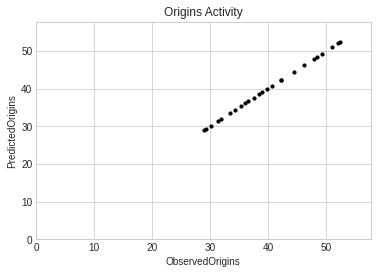

Correlation and its p-Test (0.9999999715972478, 7.795550734790324e-85)


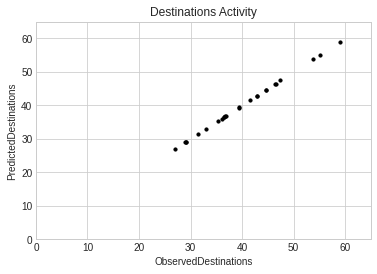

Correlation and its p-Test (0.6872811770858804, 1.4996396564121592e-88)


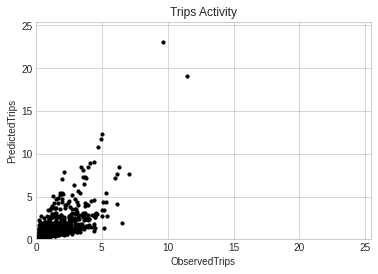

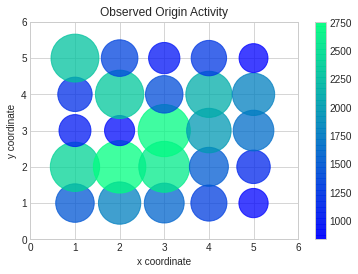

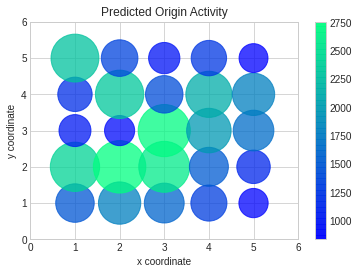

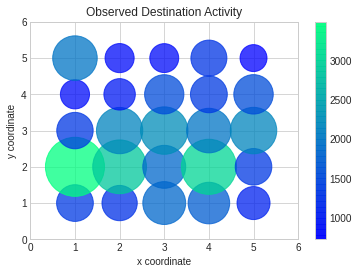

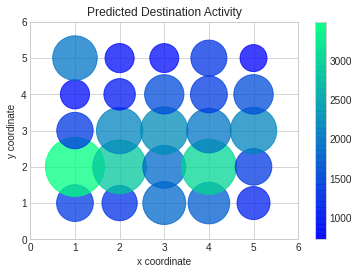

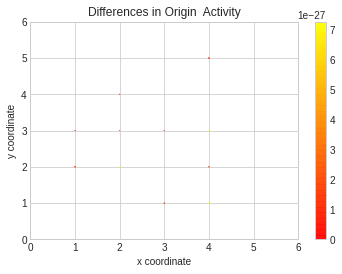

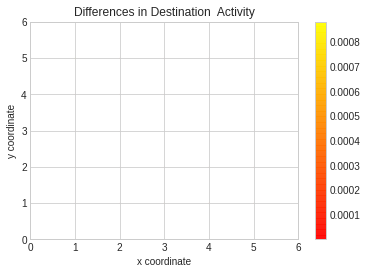

The model and its outputs are now complete



In [3]:
%matplotlib inline
import numpy as np
import math
from matplotlib import pyplot as plt
from numpy import random
import numpy as np
from scipy import stats
plt.style.use('seaborn-whitegrid')

#Defined Functions: for Plotting observed and Predicted Model Results on the Grid, 
#the Friction of Distance Parameter, and the Location-Interactions Plots for Correlations

def friction(parameter,dis):
    frict=math.exp(parameter*dis)
    return frict

def locintplot(obs,pred,activities, M):
    maxo=np.max(obs); maxop=np.max(pred)
    if maxo>maxop:
        maxv=maxo
    else:
        maxv=maxop
    maxv=maxv*(1.1)
    plt.axis([0,maxv,0,maxv])
    plt.xlabel("Observed" + activities)
    plt.ylabel("Predicted" + activities)
    plt.title(activities + " Activity")
    plt.scatter(pred, obs, s=10,c='black')
    flatobs = np.reshape(obs, M)
    flatpred = np.reshape(pred, M)
    print("Correlation and its p-Test",stats.pearsonr(flatobs, flatpred))
    return

def scattergraph(soutput,dataname,colours):
    plt.show()
    sizes=soutput**2
    plt.axis([0,n,0,n])
    plt.xlabel("x coordinate")
    plt.ylabel("y coordinate")
    plt.title(dataname + ' Activity')
    plt.scatter(xcoord, ycoord, c=sizes, s=sizes, alpha=0.75, cmap=colours)
    return

#Defining the Hypothetical Spatial System

xcoord=np.array([])
ycoord=np.array([])

n=input("Enter the Grid Size: The Number of Squares Along One Side of a Square Grid, 5 or 10, say --- ")
n=int(n); N=n*n
print("The Size of the Hypothetical Spatial System is",n, "Zones by", n,"Zones, Making", N,"in All")
print()

distance=np.full((N,N), 1.0)

n=n+1
for y in range(1,n):
    for x in range(1,n):
        xcoord = np.append(xcoord,[x]) 
        ycoord = np.append(ycoord,[y])

ij=0
for i in range (0,N):
    xi=xcoord[i]
    yi=ycoord[i]
    for j in range (0,N):
        ij=ij+1
        xj=xcoord[j]
        yj=ycoord[j]
        dis=math.sqrt((((xi-xj)**2)+((yi-yj)**2)))
        distance[i][j]=dis
        if distance[i][j]==0:
            distance[i][j]=0.5
        #print(i+1,j+1,distance[i][j])

#Defining the Hypothetical Trip, Origin and Destination Data

tobs=np.full((N,N), 1.0)
origins=np.full((N),1.0)
destinations=np.full((N),1.0)
differences=np.full((N),1.0)

for i in range (0,N):
    for j in range (0,N):
        tobs[i][j]=1.0/(distance[i][j]*(0.1+random.rand()))
Tobs = np.sum(tobs)
CMean=0.0
for i in range (0,N):
    for j in range(0,N):
        ij=ij+1
        tobs[i][j]=1000*(tobs[i][j]/Tobs)
        CMean=CMean+tobs[i][j]*distance[i][j]

origins = np.sum(tobs, axis = 1)
destinations = np.sum(tobs, axis = 0)

To=np.sum(origins) 
Td=np.sum(destinations)
Tobs = np.sum(tobs)
CMean=CMean/Tobs
print()
print("The Mean Trip Length of the Hypothetical System ", CMean)
print()
#Defining Four Types of Gravity Model
#Based on the Unconstrained (The BasicGravity Model), the Singly-Constrianed
#(Origin-Constrained and Destination Constrained) and the Doubly Constrained

beta=input("Enter the Parameter Value on Distance - beta - that You Think Best Fits the Data: It should be greater than 0 and less than 1 ---- ")
beta=float(beta)
print()

trips=np.full((N,N),1.0)
OPred=np.full((N),1.0)
DPred=np.full((N), 1.0)
trips1=np.full((N,N),1.0)
tobs1=np.full((N,N),1.0)

print("You now have to input one of the Four Model Variants that you want to run")
print()
print("We will number these as")
print()
print("1 The Unconstrained Model as in the Basic Gravity Model Program")
print("2 The Singly-Constrained (Origin-Constrained) Model")
print("3 The Singly-Constrained (Destination-Constrained) Model")
print("4 The Doubly-Constrained (Origin-and-Destination Constrained) Model")
print()

mn=input("Type in the Relevant Number from 1 to 4")
mn=int(mn)

if mn==1:
    print("You have chosen the Unconstrained Model")
if mn==2:
    print("You have chosen the Origin-Constrained Model")
if mn==3:
    print("You have chosen the Destination-Constrained Model")
if mn==4:
    print("You have chosen the Doubly-Constrained Model")

a=np.full((N),1.0)
b=np.full((N),1.0)


total=1000
if mn==1:
    for i in range(0,N):
        for j in range(0,N):
            trips[i][j]=origins[i]*destinations[j]/(friction(beta, distance[i][j]))
    Ttrip=np.sum(trips)
    CCMean=0.0
    for i in range(0,N):
        for j in range(0,N):
            trips[i][j]=total*((origins[i]*destinations[j])/(friction(beta, distance[i][j])))/Ttrip 
            CCMean=CCMean+trips[i][j]*distance[i][j]
    Ttrip=np.sum(trips)
    CCMean=CCMean/Ttrip
if mn==2:
    for i in range(0,N):
        for j in range(0,N):
            trips[i][j]=destinations[j]/(friction(beta, distance[i][j]))
    a=1/(np.sum(trips, axis=1))
    CCMean=0.0
    for i in range(0,N):
        for j in range(0,N):
            trips[i][j]=(a[i]*origins[i]*destinations[j])/(friction(beta, distance[i][j])) 
            CCMean=CCMean+trips[i][j]*distance[i][j]
    Ttrip=np.sum(trips)
    CCMean=CCMean/Ttrip
if mn==3:
    for j in range(0,N):
        for i in range(0,N):
            trips[i][j]=origins[i]/(friction(beta, distance[i][j]))
    b=1/(np.sum(trips,axis=0))
    CCMean=0.0
    for j in range(0,N):
        for i in range(0,N):
            trips[i][j]=(b[j]*origins[i]*destinations[j])/(friction(beta, distance[i][j]))
            CCMean=CCMean+trips[i][j]*distance[i][j]
    Ttrip=np.sum(trips)
    CCMean=CCMean/Ttrip
if mn==4:
    a=np.full((N),1.0)
    b=np.full((N),1.0)
    bb=np.full((N),1.0)
    aa=np.full((N),1.0)
    for k in range(0,5):
        bb=b
        aa=a
        for j in range(0,N):
            for i in range(0,N):
                trips[i][j]=a[i]*origins[i]/(friction(beta, distance[i][j]))
        b=1/(np.sum(trips,axis=0))
        for i in range(0,N):
            for j in range(0,N):
                trips[i][j]=(b[j]*destinations[j])/(friction(beta, distance[i][j]))
        a=1/(np.sum(trips, axis=1))
        difference=0.0
        diff=0.0
        for i in range(0,N):
            difference=difference+abs(bb[i]-b[i])
            diff=diff+abs(aa[i]-a[i])
#        print(k, difference, diff)
    CCMean=0.0
    for i in range(0,N):
        for j in range(0,N):
            trips[i][j]=(a[i]*origins[i]*b[j]*destinations[j])/(friction(beta, distance[i][j]))
            CCMean=CCMean+trips[i][j]*distance[i][j]
    Ttrip=np.sum(trips)
    CCMean=CCMean/Ttrip
#Printing the Predictions

OPred = np.sum(trips, axis = 1)
DPred = np.sum(trips, axis = 0)
print()
print("The Mean Trip Length for the Model ",CCMean)
print()
print("Zone","\t","ObsO","\t","ObsD","\t","PredO","\t","PredD")
print()
for i in range(0,N):
    print(i+1, "\t","{:.2f}".format(origins[i]), "\t","{:.2f}".format(destinations[i]),"\t","{:.2f}".format(OPred[i]),"\t","{:.2f}".format(DPred[i]))

#Comparing Observed with Predicted Origin Activity Using Scattergraphs

input()
locintplot(origins, OPred, 'Origins', N)
plt.savefig('OriginOutputs.png', dpi=300, bbox_inches='tight')
plt.show()

input()
locintplot(destinations, DPred, 'Destinations', N)
plt.savefig('DestOutputs.png', dpi=300, bbox_inches='tight')
plt.show()

input()
locintplot(tobs, trips, 'Trips', N*N)
plt.savefig('TripOutputs.png', dpi=300, bbox_inches='tight')
plt.show()

rng = np.random.RandomState(0)
colors = rng.rand(N)

#Plotting Observed and Predicted Locations on the Hypothetical Grid

input()
scattergraph(origins, 'Observed Origin','winter')
plt.savefig('ObsOrigins.png', dpi=300, bbox_inches='tight')
plt.colorbar()
plt.show()

input()
scattergraph(OPred, 'Predicted Origin','winter')
plt.savefig('PredOrigins.png', dpi=300, bbox_inches='tight')
plt.colorbar()
plt.show()

input()
scattergraph(destinations, 'Observed Destination','winter')
plt.savefig('ObsDestinations.png', dpi=300, bbox_inches='tight')
plt.colorbar()
plt.show()

input()
scattergraph(DPred, 'Predicted Destination','winter')
plt.savefig('PredDestinations.png', dpi=300, bbox_inches='tight')
plt.colorbar()
plt.show()

#Measuring the Differences Between Predictions and Observations

for i in range(0,N):
    differences[i]=(origins[i]-OPred[i])*6
input()

scattergraph(differences, 'Differences in Origin ','autumn')
plt.savefig('Odifferences.png', dpi=300, bbox_inches='tight')
plt.colorbar()
plt.show()

for i in range(0,N):
    differences[i]=(destinations[i]-DPred[i])*6
input()
scattergraph(differences, 'Differences in Destination ','autumn')
plt.savefig('Ddifferences.png', dpi=300, bbox_inches='tight')
plt.colorbar()
plt.show()

print("The model and its outputs are now complete")
print()